In [10]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
import networkx as nx

path = "Data/"

nets = []
nets_index = [str(i) for i in range(1992, 2003)]
for index in nets_index:
    gml_file = path + 'WDN_' +index +".txt.graphml"
    G = nx.read_graphml(gml_file)
    nets.append(G)
figure_index = 10
def new_figure():
    global figure_index
    plt.figure(figure_index)
    figure_index+=1

In [12]:
### A06.1 code
def avg_nets_clustering(nets):
    clustering_coes = []
    for G in nets:
        clustering_coes.append(nx.average_clustering(G))
    return clustering_coes
def avg_nets_reciprocity(nets):
    reci_coes = []
    for G in nets:
        reci_coes.append(nx.reciprocity(G))
    return reci_coes
def output(nets):
    clusterings = avg_nets_clustering(nets)
    reciprocities = avg_nets_reciprocity(nets)
    for i in range(0, len(nets_index)):
        print("WDN_"+nets_index[i])
        print("average_clustering: " , clusterings[i])
        print("reciprocities: ", reciprocities[i])
        print("\n")

In [23]:
sample_count = 10
max_relative_error_strength = 0.01
def sample_UBCM(G:nx.Graph, output_path):
    g_array = nx.to_numpy_array(G.to_undirected())
    UG = UndirectedGraph(g_array)
    UG.solve_tool(model="cm_exp")
    global sample_count
    UG.ensemble_sampler(sample_count, cpu_n=1, output_dir=output_path)

def sample_DBCM(G, output_path):
    g_array = nx.to_numpy_array(G)
    DG = DirectedGraph(g_array)
    DG.solve_tool(model="dcm_exp")

    global sample_count
    DG.ensemble_sampler(sample_count, cpu_n=1, output_dir=output_path)

def extract_samples(path, directed):
    nets = []
    global sample_count
    for i in range(sample_count):
        file = path + str(i) + ".txt"
        edges = np.loadtxt(file)
        if (directed):
            G = nx.from_numpy_array(build_adjacency_from_edgelist(edgelist = edges,
                                                                  is_directed = True,
                                                                  is_sparse = False,
                                                                  is_weighted = False),
                                    create_using=nx.DiGraph)
            nets.append(G)
        else:
            edges = np.loadtxt(file)
            G = nx.from_numpy_array(build_adjacency_from_edgelist(edges,is_directed = False,
                                                                  is_sparse = False,
                                                                  is_weighted = False))
            nets.append(G)
    return nets

def origin_vs_sample(nets):
    original_clustering_t = []
    original_undirected_clustering_t= []
    original_reci_t = []

    undirected_sample_clustering_t = []
    directed_sample_clustering_t =[]
    sample_reci_t = []

    for i in range(len(nets_index)):
        G = nets[i]

        original_clustering_t.append(nx.average_clustering(G))
        original_reci_t.append(nx.reciprocity(G))
        original_undirected_clustering_t.append(nx.average_clustering(G.to_undirected()))

        DBCM_path="sample_DBCM_" + nets_index[i] + "/"
        UBCM_path="sample_UBCM_" + nets_index[i] + "/"

        sample_UBCM(G, UBCM_path)
        sample_DBCM(G, DBCM_path)
        DBCM_samples = extract_samples(DBCM_path, True)
        UBCM_samples = extract_samples(UBCM_path, False)


        undirected_sample_clusterings=[]
        for sample in UBCM_samples:
            undirected_sample_clusterings.append(nx.average_clustering(sample))
        undirected_sample_clustering_t.append(np.mean(undirected_sample_clusterings))

        directed_sample_clusterings = []
        sample_reciprocities = []
        for sample in DBCM_samples:
            directed_sample_clusterings.append(nx.average_clustering(sample))
            sample_reciprocities.append(nx.reciprocity(sample))
        directed_sample_clustering_t.append(np.mean(directed_sample_clusterings))
        sample_reci_t.append(np.mean(sample_reciprocities))

    return original_undirected_clustering_t, undirected_sample_clustering_t, original_clustering_t, directed_sample_clustering_t, original_reci_t,sample_reci_t

original_undirected_clustering_t, undirected_sample_clustering_t, original_clustering_t, directed_sample_clustering_t, original_reci_t, sample_reci_t = origin_vs_sample(nets)


solution error = 8.460744993499247e-09

solution error = 4.706919298769208e-09

solution error = 2.0960158053640043e-09

solution error = 2.651709962719906e-09

solution error = 1.2267662441445282e-09

solution error = 6.045638656360097e-09

solution error = 3.766245981751126e-09

solution error = 2.6297186650481308e-09

solution error = 1.4585737062589033e-09

solution error = 2.4270860876640654e-09

solution error = 1.809041805245215e-09

solution error = 2.433324652884039e-09

solution error = 1.6848105133249192e-09

solution error = 2.257650066894712e-09

solution error = 1.272979943678365e-09

solution error = 3.2637323954531894e-09

solution error = 8.329038791998755e-09

solution error = 6.430500576470877e-09

solution error = 2.131088194801123e-09

solution error = 1.8644712440618605e-09

solution error = 7.570946536361589e-09

solution error = 2.013109678955516e-09

solution error = 3.769798695429927e-09

solution error = 2.74724598625653e-09

solution error = 3.8021710224711

In [14]:
### A06.2 code
def strength_assortativity_coefficient(nets):
    for i in range(0, len(nets_index)):
        G = nets[i]
        sac_in_in = nx.degree_pearson_correlation_coefficient(G, x='in', y='in', weight='weight')
        sac_in_out = nx.degree_pearson_correlation_coefficient(G, x='in', y='out', weight='weight')
        sac_out_out = nx.degree_pearson_correlation_coefficient(G, x='out', y='out', weight='weight')
        print("WDN_"+nets_index[i])
        print("strength_assortativity_coefficient in-in: " , sac_in_in)
        print("strength_assortativity_coefficient in-out: " , sac_in_out)
        print("strength_assortativity_coefficient out-out: " , sac_out_out)
        print("\n")

In [15]:
def weighted_sample_UECM(G, output_path):
    g_array = nx.to_numpy_array(G.to_undirected())

    UG = UndirectedGraph(g_array)
    UG.solve_tool(model="crema",
                  method="newton",
                  initial_guess="random",
                  adjacency="cm_exp",
                  method_adjacency="newton")
    ## increase step until finding a small enough relative_error_strength
    global max_relative_error_strength
    step = 200
    current_max = 100
    while UG.relative_error_strength > max_relative_error_strength:
        current_max+=step
        UG.solve_tool(model="crema",
                      method="newton",
                      initial_guess="random",
                      adjacency="cm_exp",
                      method_adjacency="newton", max_steps=current_max)
    print(UG.relative_error_strength)

    global sample_count
    UG.ensemble_sampler(sample_count, cpu_n=1, output_dir=output_path)

def weighted_sample_DECM(G, output_path):
    g_array = nx.to_numpy_array(G)
    DG = DirectedGraph(g_array)
    DG.solve_tool(model="crema",
                  method="newton",
                  initial_guess="random",
                  adjacency="dcm_exp",
                  method_adjacency="newton")
    global max_relative_error_strength
    step = 200
    current_max = 100
    while DG.relative_error_strength > max_relative_error_strength:
        current_max+=step
        DG.solve_tool(model="crema",
                  method="newton",
                  initial_guess="random",
                  adjacency="dcm_exp",
                  method_adjacency="newton", max_steps=current_max)
    print(DG.relative_error_strength)

    global sample_count
    DG.ensemble_sampler(sample_count, cpu_n=1, output_dir=output_path)

def extract_weighted_samples(path, directed):
    nets = []
    global sample_count
    for i in range(sample_count):
        file = path + str(i) + ".txt"
        edges = np.loadtxt(file)
        if (directed):
            G = nx.from_numpy_array(build_adjacency_from_edgelist(edgelist = edges,
                                                                  is_directed = True,
                                                                  is_sparse = False,
                                                                  is_weighted = True),
                                    create_using=nx.DiGraph)
            nets.append(G)
        else:
            edges = np.loadtxt(file)
            G = nx.from_numpy_array(build_adjacency_from_edgelist(edges,is_directed = False,
                                                                  is_sparse = False,
                                                                  is_weighted = True))
            nets.append(G)
    return nets

def origin_vs_weighted_sample(nets):
    original_undirected_sac = []
    original_in_in_directed_sac = []
    original_in_out_directed_sac = []
    original_out_out_directed_sac = []

    undirected_avg_sample_sac=[]
    directed_avg_in_in_sample_sac = []
    directed_avg_in_out_sample_sac = []
    directed_avg_out_out_sample_sac = []
    for i in range(len(nets_index)):
        G = nets[i]
        original_undirected_sac.append(nx.degree_pearson_correlation_coefficient(G.to_undirected(),  weight='weight'))
        original_in_out_directed_sac.append(nx.degree_pearson_correlation_coefficient(G, x="in", y="out", weight='weight'))
        original_in_in_directed_sac.append(nx.degree_pearson_correlation_coefficient(G, x="in", y="in", weight='weight'))
        original_out_out_directed_sac.append(nx.degree_pearson_correlation_coefficient(G, x="out", y="out", weight='weight'))

        weighted_UECM_path= "sample_UECM_" + nets_index[i] + "/"
        weighted_sample_UECM(G,weighted_UECM_path)

        weighted_DECM_path = "sample_DECM_" + nets_index[i] + "/"
        weighted_sample_DECM(G, weighted_DECM_path)

        undirected_samples = extract_weighted_samples(weighted_UECM_path, False)
        undirected_samples_sac = []
        for sample in undirected_samples:
            undirected_samples_sac.append(nx.degree_pearson_correlation_coefficient(sample, weight="weight"))
        undirected_avg_sample_sac.append(np.mean(undirected_samples_sac))

        weighted_samples = extract_weighted_samples(weighted_DECM_path, True)

        directed_in_in_sample_sac = []
        directed_in_out_sample_sac = []
        directed_out_out_sample_sac = []
        for weighted_sample in weighted_samples:
            directed_in_out_sample_sac.append(nx.degree_pearson_correlation_coefficient(weighted_sample, x="in", y="out", weight='weight'))
            directed_in_in_sample_sac.append(nx.degree_pearson_correlation_coefficient(weighted_sample, x="in", y="in", weight='weight'))
            directed_out_out_sample_sac.append(nx.degree_pearson_correlation_coefficient(weighted_sample, x="out", y="out", weight='weight'))
        directed_avg_in_in_sample_sac.append(np.mean(directed_in_in_sample_sac))
        directed_avg_in_out_sample_sac.append(np.mean(directed_in_out_sample_sac))
        directed_avg_out_out_sample_sac.append(np.mean(directed_out_out_sample_sac))

    return original_undirected_sac, undirected_avg_sample_sac, original_in_in_directed_sac,directed_avg_in_in_sample_sac,original_in_out_directed_sac,directed_avg_in_out_sample_sac,original_out_out_directed_sac ,directed_avg_out_out_sample_sac
original_undirected_sac, undirected_avg_sample_sac, original_in_in_directed_sac,directed_avg_in_in_sample_sac,original_in_out_directed_sac,directed_avg_in_out_sample_sac,original_out_out_directed_sac ,directed_avg_out_out_sample_sac = origin_vs_weighted_sample(nets)

/Users/jun/Documents/study/course/foundation of ds/FDS21-M56/venv/lib/python3.9/site-packages/numba/core/utils.py:544: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/Users/jun/Documents/study/course/foundation of ds/FDS21-M56/venv/lib/python3.9/site-packages/NEMtropy/models_functions.py:1554: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/Users/jun/Documents/study/course/foundation of ds/FDS21-M56/venv/lib/python3.9/site-packages/NEMtropy/models_functions.py:1555: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/Users/jun/Documents/study/course/foundation of ds/FDS21-M56/venv/lib/python3.9/site-packages/numba/core/utils.py:544: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is exp


solution error = 352413020856.965


/Users/jun/Documents/study/course/foundation of ds/FDS21-M56/venv/lib/python3.9/site-packages/numba/core/utils.py:544: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 348205424890.4583

solution error = 361391098064.16754

solution error = 94848987149.60522

solution error = 2831027999.972534

solution error = 0.3219512365758419
2.7923406513786444e-08


/Users/jun/Documents/study/course/foundation of ds/FDS21-M56/venv/lib/python3.9/site-packages/numba/core/utils.py:544: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/Users/jun/Documents/study/course/foundation of ds/FDS21-M56/venv/lib/python3.9/site-packages/NEMtropy/models_functions.py:4515: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/Users/jun/Documents/study/course/foundation of ds/FDS21-M56/venv/lib/python3.9/site-packages/NEMtropy/models_functions.py:4516: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/Users/jun/Documents/study/course/foundation of ds/FDS21-M56/venv/lib/python3.9/site-packages/numba/core/utils.py:544: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is exp


solution error = 341887354841.41156


/Users/jun/Documents/study/course/foundation of ds/FDS21-M56/venv/lib/python3.9/site-packages/numba/core/utils.py:544: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 339342588473.0461

solution error = 333059337647.0948

solution error = 306924613668.5812

solution error = 264937503977.4226

solution error = 337292.6010131836
0.00036840626633613294


/Users/jun/Documents/study/course/foundation of ds/FDS21-M56/venv/lib/python3.9/site-packages/numba/core/utils.py:544: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",



solution error = 390371485805.084

solution error = 382873719837.6179

solution error = 306508023827.5967

solution error = 187690644812.6255

solution error = 4616.514991730452
6.728066529497702e-05

solution error = 361062957649.6331

solution error = 359104393854.6945

solution error = 2167295114112.1353

solution error = 322326716909.0736

solution error = 226235017029.84518

solution error = 512295.64166259766
1.6994193851824243e-06

solution error = 427145058853.9345

solution error = 421640783453.30756

solution error = 382222757749.4025

solution error = 206736305495.8216

solution error = 0.0064926184713840485
3.0794354011619104e-10

solution error = 3853860532786.0386

solution error = 404478878735.80743

solution error = 397908187060.999

solution error = 380411554849.6249

solution error = 283790202273.933

solution error = 86716542069.24335

solution error = 190357.7850341797
0.000758154159452391

solution error = 477525650504.48676

solution error = 471806726807.3386

so

### A06.1  - 1 coefficients

In [16]:
output(nets)

WDN_1992
average_clustering:  0.8021364732946835
reciprocities:  0.367340010185028


WDN_1993
average_clustering:  0.7826552252417198
reciprocities:  0.430931744312026


WDN_1994
average_clustering:  0.778118724128831
reciprocities:  0.541138903672166


WDN_1995
average_clustering:  0.769316598518603
reciprocities:  0.6043664931031333


WDN_1996
average_clustering:  0.779859983253989
reciprocities:  0.6482433229421182


WDN_1997
average_clustering:  0.7844618494148852
reciprocities:  0.6822429906542056


WDN_1998
average_clustering:  0.7913458153848136
reciprocities:  0.7015887290167866


WDN_1999
average_clustering:  0.7946922756897296
reciprocities:  0.716582186821144


WDN_2000
average_clustering:  0.7928732278480053
reciprocities:  0.7232351897836112


WDN_2001
average_clustering:  0.8020845961993215
reciprocities:  0.7375525101577026


WDN_2002
average_clustering:  0.7955013137787762
reciprocities:  0.7041909280425562




### A06.1 - 3 plot

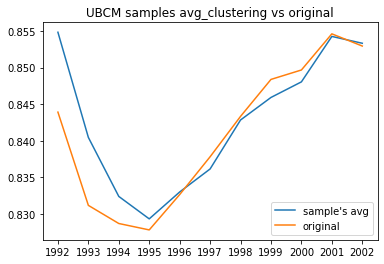

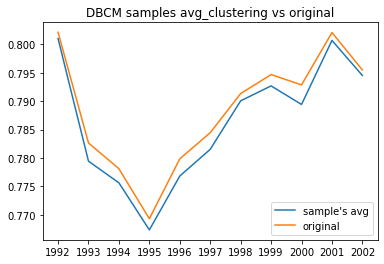

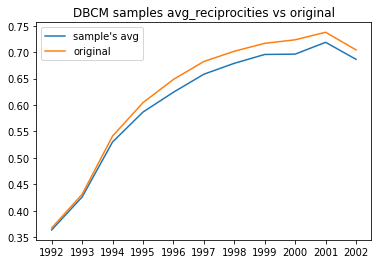

In [24]:
new_figure()
plt.title("UBCM samples avg_clustering vs original")
plt.plot(nets_index, undirected_sample_clustering_t, label = "sample's avg")
plt.plot(nets_index, original_undirected_clustering_t, label = "original")
plt.legend()

new_figure()
plt.title("DBCM samples avg_clustering vs original")
plt.plot(nets_index, directed_sample_clustering_t, label = "sample's avg")
plt.plot(nets_index, original_clustering_t, label = "original")
plt.legend()

new_figure()
plt.title("DBCM samples avg_reciprocities vs original")
plt.plot(nets_index, sample_reci_t, label = "sample's avg")
plt.plot(nets_index, original_reci_t, label = "original")
plt.legend()

### A06.02 - 1

In [18]:
strength_assortativity_coefficient(nets)

WDN_1992
strength_assortativity_coefficient in-in:  -0.04868776409103535
strength_assortativity_coefficient in-out:  -0.04664740434092386
strength_assortativity_coefficient out-out:  -0.057603189205412623


WDN_1993
strength_assortativity_coefficient in-in:  -0.06537929984057926
strength_assortativity_coefficient in-out:  -0.06218986718761447
strength_assortativity_coefficient out-out:  -0.06910618411247678


WDN_1994
strength_assortativity_coefficient in-in:  -0.07868988970611884
strength_assortativity_coefficient in-out:  -0.07622523439269807
strength_assortativity_coefficient out-out:  -0.07800143058821395


WDN_1995
strength_assortativity_coefficient in-in:  -0.07921393553292569
strength_assortativity_coefficient in-out:  -0.07702100817504068
strength_assortativity_coefficient out-out:  -0.07638722326404518


WDN_1996
strength_assortativity_coefficient in-in:  -0.07686964594098097
strength_assortativity_coefficient in-out:  -0.07546909805023333
strength_assortativity_coefficient ou

### A06.02 - plot

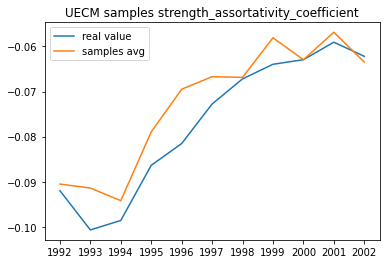

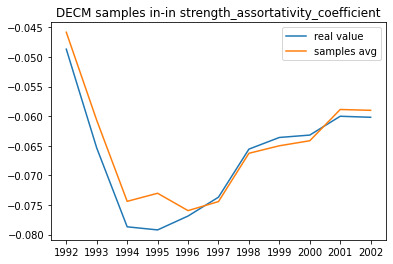

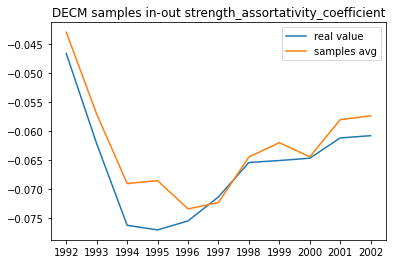

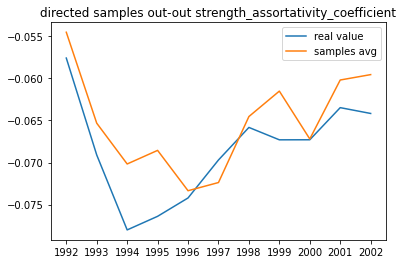

In [21]:
new_figure()
plt.title("UECM samples strength_assortativity_coefficient")
plt.plot(nets_index, original_undirected_sac, label="real value")
plt.plot(nets_index, undirected_avg_sample_sac, label="samples avg")
plt.legend()

new_figure()
plt.title("DECM samples in-in strength_assortativity_coefficient")
plt.plot(nets_index, original_in_in_directed_sac, label="real value")
plt.plot(nets_index, directed_avg_in_in_sample_sac, label="samples avg")
plt.legend()

new_figure()
plt.title("DECM samples in-out strength_assortativity_coefficient")
plt.plot(nets_index, original_in_out_directed_sac, label="real value")
plt.plot(nets_index, directed_avg_in_out_sample_sac, label="samples avg")
plt.legend()

new_figure()
plt.title("directed samples out-out strength_assortativity_coefficient")
plt.plot(nets_index, original_out_out_directed_sac, label="real value")
plt.plot(nets_index, directed_avg_out_out_sample_sac, label="samples avg")
plt.legend()

### A06.3
The average clustering coefficients here can somehow represent the possibility that one country trade partners also make trade with each other. So from 1992 to 2002, the values are around 0.8. So it means many countries make trade to each other directly.
And the extent of this coorperation remains almost the same but drops a little before 1995.

The reciprocity here measures the partion, or say the possibility, that countries have mutual trade relations, i.e. countries import from and export to other countres.
The value increase from 1992, so it means the mutual trade grows.

The strength assortivity means the tendency that countries having large amount of trade partners tend to build trade relation with countries also have a lot of partners.
In details, the in-in strength assortivity represents the tendency that countries tend to import from countries import a lot.
The in-out assortivity means the tendency that countries tend to import from countries export a lot, and vice versa.
And the out-out means the tendency that countries tend to export from countries export a lot.
All the values here are negative, so the tendency mentioned above is like one country exporting or importing a lot tends to export or import from countries having low in- or out-degree.

From the models.
the difference between UBCM samples' average clustering coefficients and the orginal before 1995 is relatively large.
When turning the original networks to undirected and using UBCM to fit them, the assumption here is that the the degree distribution is the same, and we don't consider the in- and out-degree when sampling.
So the difference of average clustering coefficient somewhat means before 1995, there were more countries didn't have mutual trade than after.

DBCM samples average clustering coefficients are almost the same as the originals. It is because of the assumption that the in- and out-degree distribution is the same. So the average clustering coeffiecients here do change a lot.
And the reciprocities here can prove the conclusion drawn from UBCM.
Also, from the DBCM samples' reciprocity, the nodes which have mutual relation are not dense in a group but seperating around the whole networks, i.e. countires with mutual relation do not gather together like a local union. So after sampling, the reciprocity coeffieients are not largely different from the originals.

DECM takes weights, i.e. trade volume, into account.
From the negative strength assotativity, in addition to countries trade with countries which may not have a lot of trade relations to other countries, high-trade-value countries also build trade with countries having less trade value.
And the absolute value is not too large, so it's like neutral assortive.
The difference between samples and original means some specific countries's exporting and importing value increased more than other countries. The assotativity values of original networks may depend on some specific countries in networks. 

